In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# reading excel in pandas
df = pd.read_csv('data.csv')

C:\Users\Anonymous\AppData\Local\Temp\ipykernel_13156\2121108671.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data.csv')


In [3]:
df.shape

(143708, 32)

In [4]:
df.describe()

,Property_id,builder_id,City_id,Locality_ID,Longitude,Latitude,Sub_urban_ID,listing_domain_score
count,1.437080e+05,1.437080e+05,143708.000000,143708.000000,143708.000000,143708.000000,143708.000000,143708.000000
mean,1.340533e+07,1.075874e+07,12.548181,53522.635796,76.258530,18.639236,10115.063093,4.003831
std,2.459556e+06,3.058571e+07,6.869908,11219.616279,4.583972,4.022061,158.883739,0.069158
min,5.000114e+06,1.000020e+05,1.000000,50001.000000,70.057556,8.701280,10003.000000,4.000000
25%,1.266856e+07,1.006230e+05,5.000000,50063.000000,72.879242,17.387215,10040.000000,4.000000
50%,1.435550e+07,1.032410e+05,18.000000,51187.000000,73.113091,19.159641,10043.000000,4.000000
75%,1.516795e+07,6.431960e+05,18.000000,51883.000000,78.156197,19.291704,10176.000000,4.000000
max,1.558014e+07,1.007295e+08,23.000000,173237.000000,88.611221,30.757280,11613.000000,8.710400


In [5]:
df['Price_per_unit_area'].head(5)

0    4285
1    7000
2    5752
3    2486
4    5324
Name: Price_per_unit_area, dtype: object

In [6]:
lst = []
for i in range(len(df)):
    lst.append(df['Price_per_unit_area'][i])

In [7]:
def fun(x):
    if isinstance(x, str):
        return int(x.replace(',', ''))
    return x
df['Price_per_unit_area'] = df['Price_per_unit_area'].apply(fun)

In [8]:
df['Price_per_unit_area'].min()

104

In [9]:
df['Price_per_unit_area'].max()

171969

In [10]:
df['Price_per_unit_area'].mean()

10664.535599966599

In [11]:
bin_ranges = [0, 3000, 10000, float('inf')]  
bin_labels = ['Low Range', 'Medium Range', 'High Range']
df['price_range'] = pd.cut(df['Price_per_unit_area'], bins=bin_ranges, labels=bin_labels)

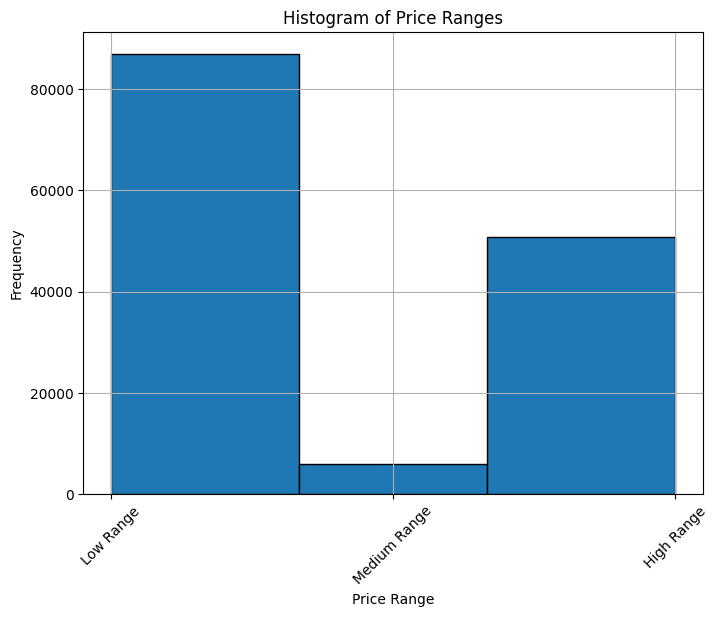

In [12]:
plt.figure(figsize=(8, 6))
df['price_range'].hist(edgecolor='black', bins=len(bin_labels), align='mid')
plt.title('Histogram of Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Frequency')
plt.xticks(range(len(bin_labels)), bin_labels, rotation=45)
plt.show()

In [13]:
# now performing and printing the results of each category separately
grouped_data=df.groupby('price_range')

In [14]:
grouped_data.describe()

Property_id                                                      \
                   count          mean           std        min          25%   
price_range                                                                    
Low Range         6070.0  1.374696e+07  2.321986e+06  5000397.0  13343095.75   
Medium Range     86858.0  1.330304e+07  2.572762e+06  5000114.0  12594647.50   
High Range       50780.0  1.353945e+07  2.259199e+06  5000548.0  12772440.00   

                                                 Price_per_unit_area  \
                     50%         75%         max               count   
price_range                                                            
Low Range     14674159.0  15236519.5  15579795.0              6070.0   
Medium Range  14344536.0  15139593.0  15580142.0             86858.0   
High Range    14326554.5  15197360.0  15579849.0             50780.0   

                            ... Sub_urban_ID          listing_domain_score  \
                      mean  ...          75%      max                count   
price_range                 ...                                              
Low Range      2012.567381  ...      10238.0  11606.0               6070.0   
Medium Range   6327.999125  ...      10229.0  11613.0              86858.0   
High Range    19116.294801  ...      10048.0  11606.0              50780.0   

                                                               
                  mean       std  min  25%  50%  75%      max  
price_range                                                    
Low Range     4.000000  0.000000  4.0  4.0  4.0  4.0  4.00000  
Medium Range  4.005272  0.085871  4.0  4.0  4.0  4.0  8.71040  
High Range    4.001823  0.030221  4.0  4.0  4.0  4.0  5.81818  

[3 rows x 72 columns]

In [15]:
for label, group in grouped_data:
    print("Category:", label)
    print("Number of data points:", len(group))
    print("Minimum Price per Unit Area:", group['Price_per_unit_area'].min())
    print("Maximum Price per Unit Area:", group['Price_per_unit_area'].max())
    print("Average Price per Unit Area:", group['Price_per_unit_area'].mean())
    print("\n")

Category: Low Range
Number of data points: 6070
Minimum Price per Unit Area: 104
Maximum Price per Unit Area: 3000
Average Price per Unit Area: 2012.5673805601318


Category: Medium Range
Number of data points: 86858
Minimum Price per Unit Area: 3001
Maximum Price per Unit Area: 10000
Average Price per Unit Area: 6327.999125008635


Category: High Range
Number of data points: 50780
Minimum Price per Unit Area: 10002
Maximum Price per Unit Area: 171969
Average Price per Unit Area: 19116.294801102795




In [16]:
category_counts = df['price_range'].value_counts()

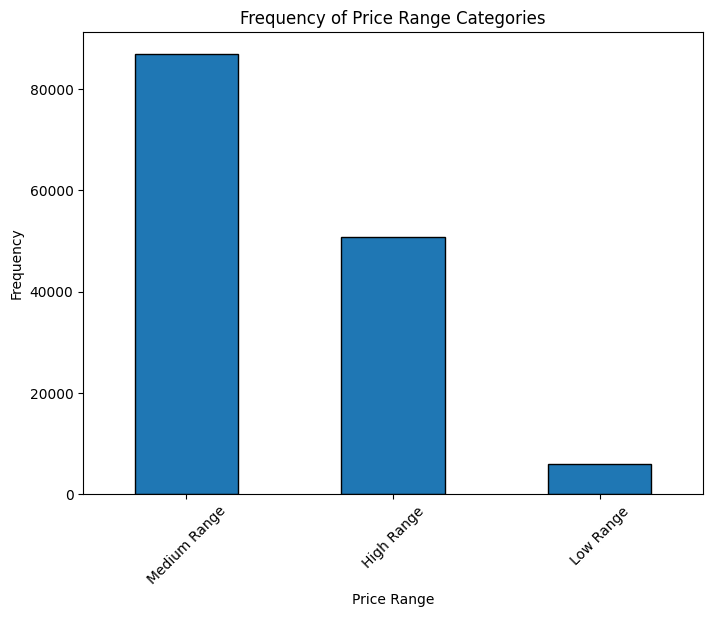

In [17]:
plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar', edgecolor='black')
plt.title('Frequency of Price Range Categories')
plt.xlabel('Price Range')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [18]:
city_df=df.groupby('City_name')

In [19]:
city_df.describe()

Property_id                                                      \
                count          mean           std        min          25%   
City_name                                                                   
Ahmedabad      6612.0  1.341468e+07  2.470620e+06  5017524.0  12881886.00   
Bangalore     21019.0  1.266173e+07  2.949862e+06  5000249.0  10541943.00   
Chennai       13406.0  1.311724e+07  2.646538e+06  5000397.0  12036643.00   
Delhi          7476.0  1.376750e+07  1.769508e+06  5000548.0  12907842.75   
Hyderabad      9129.0  1.349597e+07  2.622855e+06  5006775.0  13109924.00   
Kolkata       12224.0  1.294054e+07  2.801098e+06  5002546.0  10667127.00   
Lucknow        1690.0  1.332651e+07  2.870221e+06  5023638.0  12923705.00   
Mumbai        72152.0  1.370621e+07  2.149023e+06  5000114.0  13013570.00   

                                               Price_per_unit_area  \
                  50%          75%         max               count   
City_name                                                            
Ahmedabad  14289935.0  15136233.75  15579866.0              6612.0   
Bangalore  13889771.0  14949123.00  15579366.0             21019.0   
Chennai    14231174.0  15093281.75  15580142.0             13406.0   
Delhi      14407343.0  15081745.50  15579121.0              7476.0   
Hyderabad  14513748.0  15178769.00  15579795.0              9129.0   
Kolkata    14151158.0  15142952.25  15579849.0             12224.0   
Lucknow    14586422.0  15090611.50  15577296.0              1690.0   
Mumbai     14440240.0  15237475.00  15579717.0             72152.0   

                         ... Sub_urban_ID          listing_domain_score  \
                   mean  ...          75%      max                count   
City_name                ...                                              
Ahmedabad   5399.164398  ...      10229.0  10237.0               6612.0   
Bangalore   7030.863076  ...      10447.0  11262.0              21019.0   
Chennai     6137.574892  ...      10257.0  11488.0              13406.0   
Delhi       9389.274880  ...      10212.0  11613.0               7476.0   
Hyderabad   5528.382517  ...      10233.0  11472.0               9129.0   
Kolkata     5968.176211  ...      10038.0  11482.0              12224.0   
Lucknow     4275.186982  ...      10271.0  10474.0               1690.0   
Mumbai     14774.017241  ...      10045.0  10561.0              72152.0   

                                                            
               mean       std  min  25%  50%  75%      max  
City_name                                                   
Ahmedabad  4.000951  0.023006  4.0  4.0  4.0  4.0  4.82143  
Bangalore  4.006694  0.093665  4.0  4.0  4.0  4.0  7.14286  
Chennai    4.005155  0.115885  4.0  4.0  4.0  4.0  8.39286  
Delhi      4.004819  0.132990  4.0  4.0  4.0  4.0  8.71040  
Hyderabad  4.006439  0.061471  4.0  4.0  4.0  4.0  5.00000  
Kolkata    4.012388  0.090387  4.0  4.0  4.0  4.0  4.82143  
Lucknow    4.000000  0.000000  4.0  4.0  4.0  4.0  4.00000  
Mumbai     4.001222  0.026616  4.0  4.0  4.0  4.0  7.71576  

[8 rows x 72 columns]

In [20]:
unique_cities=np.array(city_df['City_name'].unique())

In [21]:
unique_cities

array([array(['Ahmedabad'], dtype=object),
       array(['Bangalore'], dtype=object),
       array(['Chennai'], dtype=object), array(['Delhi'], dtype=object),
       array(['Hyderabad'], dtype=object),
       array(['Kolkata'], dtype=object), array(['Lucknow'], dtype=object),
       array(['Mumbai'], dtype=object)], dtype=object)

In [22]:
print(df.columns.tolist())

['Property_Name', 'Property_id', 'Property_type', 'Property_status', 'Price_per_unit_area', 'Posted_On', 'Project_URL', 'builder_id', 'Builder_name', 'Property_building_status', 'City_id', 'City_name', 'No_of_BHK', 'Locality_ID', 'Locality_Name', 'Longitude', 'Latitude', 'Price', 'Size', 'Sub_urban_ID', 'Sub_urban_name', 'description', 'is_furnished', 'listing_domain_score', 'is_plot', 'is_RERA_registered', 'is_Apartment', 'is_ready_to_move', 'is_commercial_Listing', 'is_PentaHouse', 'is_studio', 'Listing_Category', 'price_range']


In [23]:
df_city_data = df[['City_name','Locality_Name','Price','Size']]

In [24]:
df_city_data.describe()

,City_name,Locality_Name,Price,Size
count,143708,143708,143708,143708
unique,8,1244,29490,4120
top,Mumbai,Mira Road East,"90,00,000",650 sq ft
freq,72152,9590,1181,2022


In [25]:
def f(x):
    if isinstance(x, str):
        return int(x.replace(',', ''))
    return int(x)
df_city_data['Price'] = df_city_data['Price'].apply(f)

C:\Users\Anonymous\AppData\Local\Temp\ipykernel_13156\3412681228.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city_data['Price'] = df_city_data['Price'].apply(f)


In [26]:
def remove_sqft(x):
    if isinstance(x,str):
        x=x.replace(' sq ft','')
        if ',' in x:
            x=x.replace(',','')
        return int(x)
    return int(x)

df_city_data['Size'] = df_city_data['Size'].apply(remove_sqft)

C:\Users\Anonymous\AppData\Local\Temp\ipykernel_13156\491031242.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city_data['Size'] = df_city_data['Size'].apply(remove_sqft)


In [27]:
df_city_data['Price'].mean()

13650943.067859827

In [28]:
df_city_data['Locality_category'] = df_city_data['Price'].apply(lambda x: 'Expensive' if x > 14000000 else 'Affordable')

C:\Users\Anonymous\AppData\Local\Temp\ipykernel_13156\3616915580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city_data['Locality_category'] = df_city_data['Price'].apply(lambda x: 'Expensive' if x > 14000000 else 'Affordable')


In [29]:
df_city_data.head()

,City_name,Locality_Name,Price,Size,Locality_category
0,Ahmedabad,Bopal,7500000,1750,Affordable
1,Ahmedabad,Ambli,23688000,3384,Expensive
2,Ahmedabad,Naryanpura,13200840,2295,Affordable
3,Ahmedabad,Changodar,2283000,918,Affordable
4,Ahmedabad,Shilaj,9371000,1760,Affordable


In [30]:
df_city_data['Locality_category'].value_counts()

Locality_category
Affordable    103440
Expensive      40268
Name: count, dtype: int64

In [31]:
df_city_grouped = df_city_data.groupby(['City_name', 'Locality_category']).size().unstack()

In [32]:
df_city_grouped.describe()

Locality_category,Affordable,Expensive
count,8.000000,8.000000
mean,12930.000000,5033.500000
std,14767.370498,8047.650358
min,1584.000000,106.000000
25%,4610.000000,1615.250000
50%,9006.000000,1868.500000
75%,12715.750000,4104.750000
max,47535.000000,24617.000000


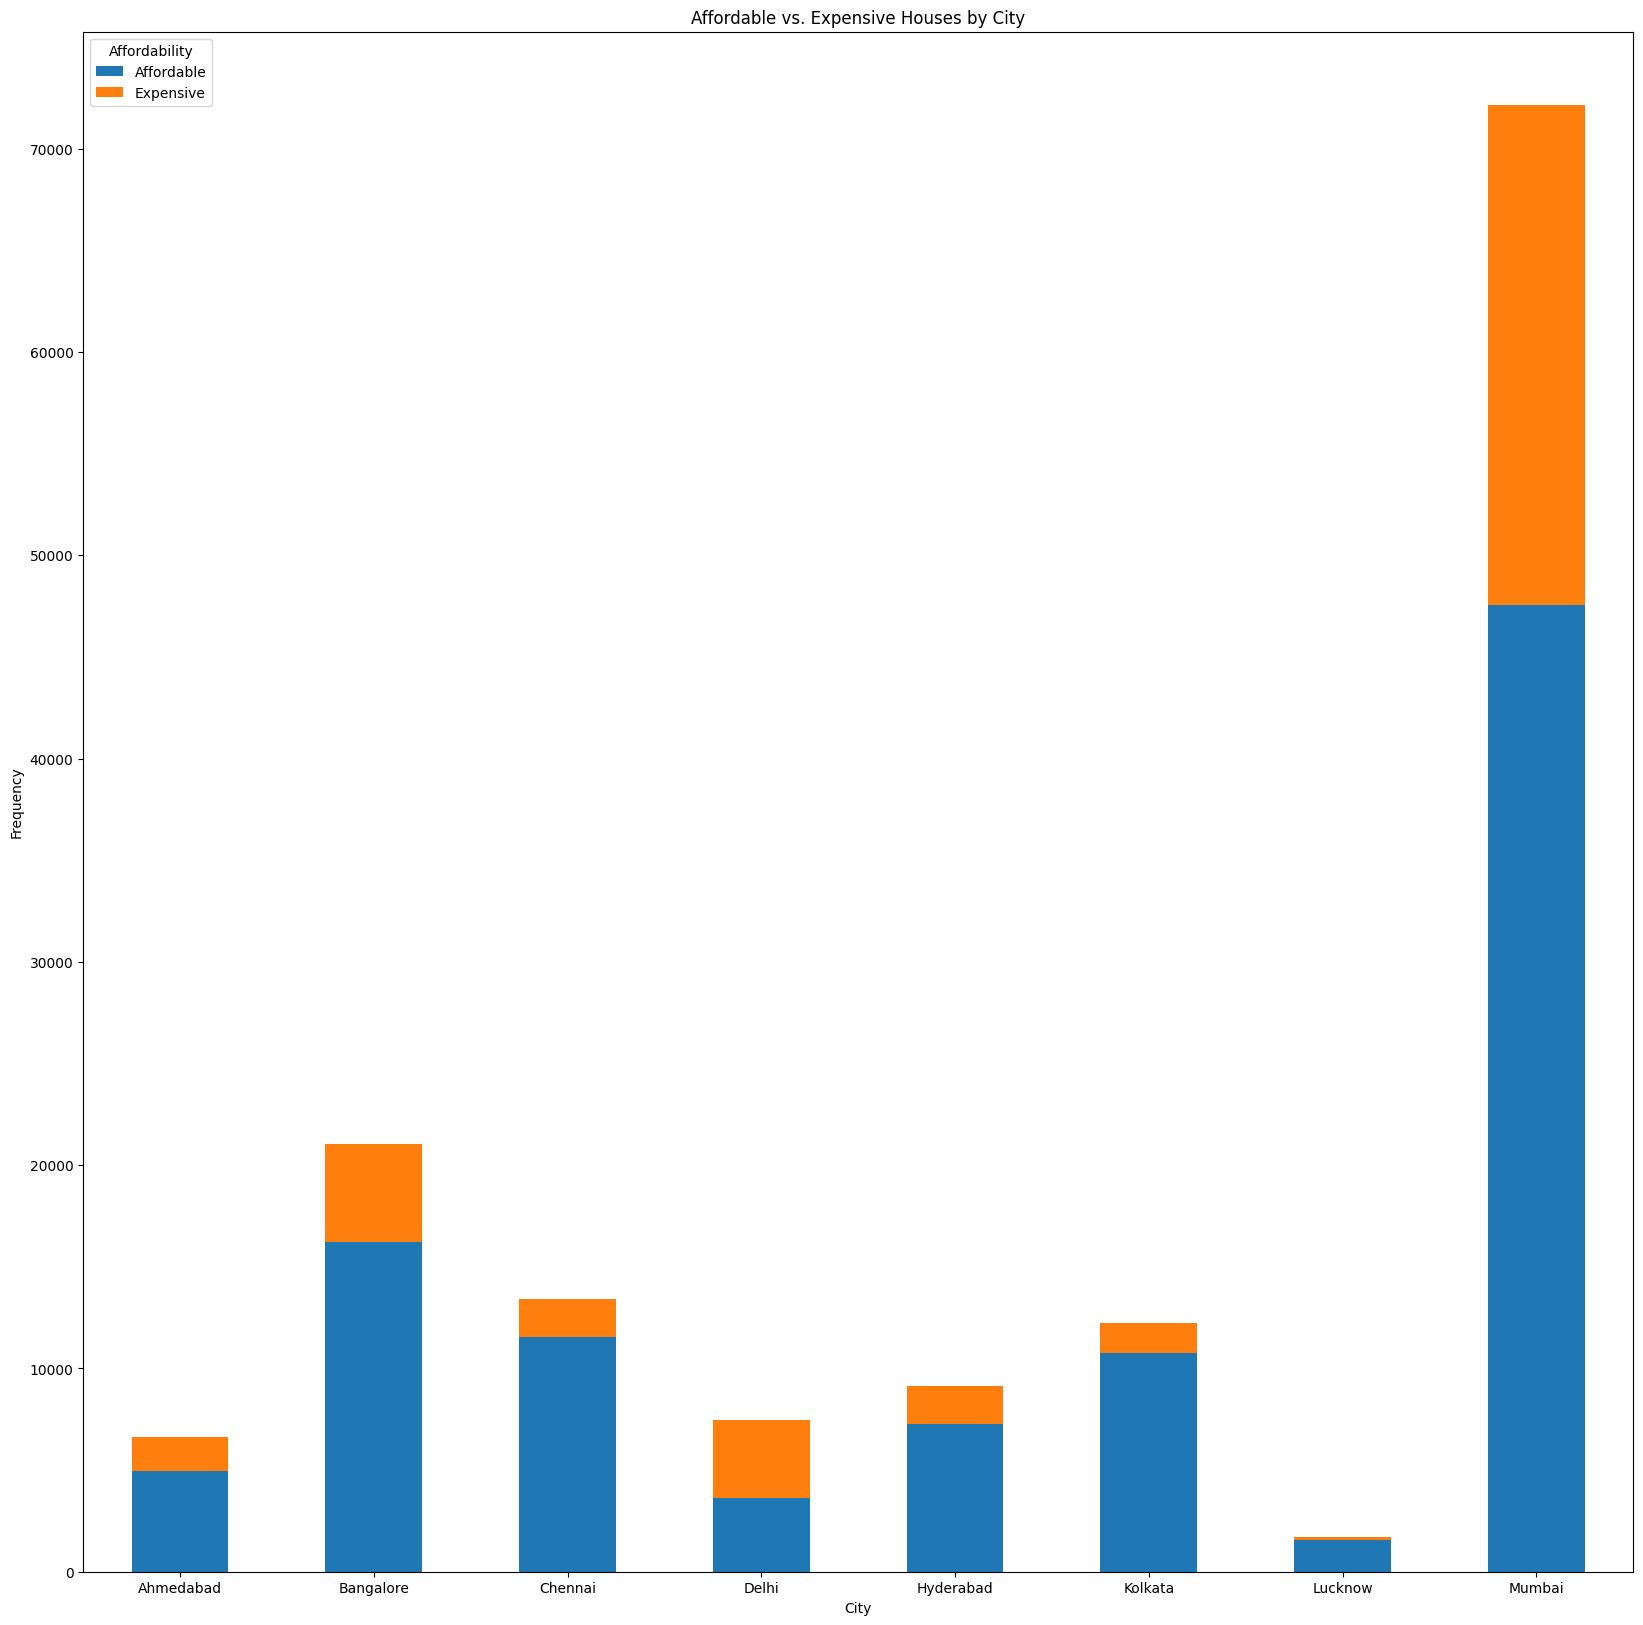

In [33]:
ax = df_city_grouped.plot(kind='bar', stacked=True,figsize=(20, 20))
plt.xlabel('City')
plt.ylabel('Frequency')
plt.title('Affordable vs. Expensive Houses by City')
plt.legend(title='Affordability')
plt.xticks(rotation=0)
plt.show()

In [34]:
df_city_grouped.head()

Locality_category,Affordable,Expensive
City_name,,
Ahmedabad,4944,1668
Bangalore,16204,4815
Chennai,11553,1853
Delhi,3608,3868
Hyderabad,7245,1884


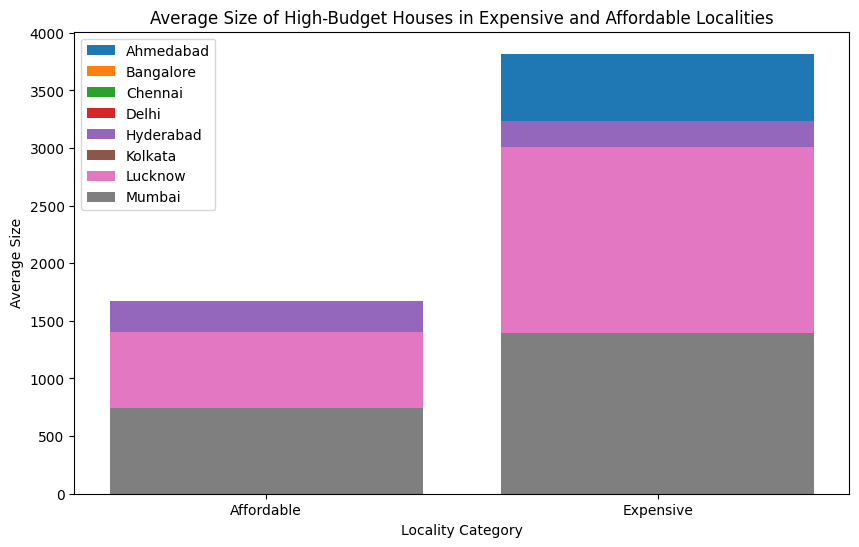

In [35]:
grouped_data = df_city_data.groupby(['City_name', 'Locality_category']).agg({'Size': 'mean', 'Price': 'mean'}).reset_index()

# Filter high-budget houses (for example, where price is above a certain threshold)
price_threshold = 1000000  # Example threshold in your currency
high_budget_data = grouped_data[grouped_data['Price'] >= price_threshold]

# Plotting
plt.figure(figsize=(10, 6))
for city in high_budget_data['City_name'].unique():
    city_data = high_budget_data[high_budget_data['City_name'] == city]
    plt.bar(city_data['Locality_category'], city_data['Size'], label=city)

plt.xlabel('Locality Category')
plt.ylabel('Average Size')
plt.title('Average Size of High-Budget Houses in Expensive and Affordable Localities')
plt.legend()
plt.show()

In [36]:
#performing analysis for finding the hotspot for offices in Mumbai and Ahmedabad


mumbai_df = df_city_data[df_city_data['City_name']=='Mumbai']
mumbai_df.head(5)

,City_name,Locality_Name,Price,Size,Locality_category
71556,Mumbai,Malad West,15498000,738,Expensive
71557,Mumbai,Thane West,18700000,887,Expensive
71558,Mumbai,Bhiwandi,5616000,1080,Affordable
71559,Mumbai,Kamothe,5800000,404,Affordable
71560,Mumbai,Titwala,2900000,429,Affordable


In [37]:
mumbai_df = mumbai_df[mumbai_df['Locality_category']=='Affordable']

In [40]:
mumbai_df.head()

,City_name,Locality_Name,Price,Size,Locality_category
71558,Mumbai,Bhiwandi,5616000,1080,Affordable
71559,Mumbai,Kamothe,5800000,404,Affordable
71560,Mumbai,Titwala,2900000,429,Affordable
71561,Mumbai,Diva,3349000,619,Affordable
71562,Mumbai,Dahisar,14000000,625,Affordable


In [41]:
print(mumbai_df['Price'].max())
print(mumbai_df['Price'].min())
print(mumbai_df['Price'].mean())

14000000
220000
7179961.196360576


In [45]:
print(mumbai_df['Size'].max())
print(mumbai_df['Size'].min())
print(mumbai_df['Size'].mean())

10000
127
743.651709266856


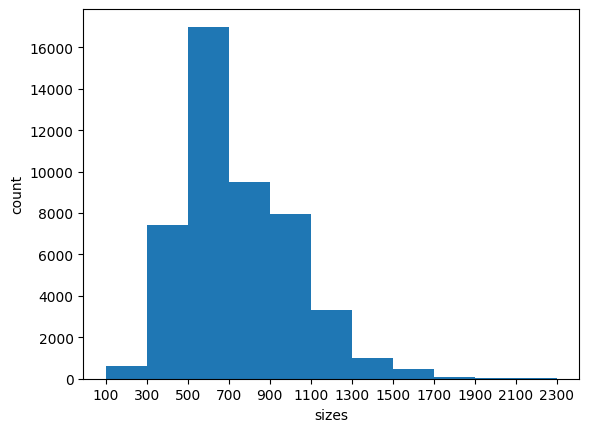

In [53]:
sizes = [si for si in range(100,2401,200)]
plt.hist(mumbai_df.Size,bins=sizes)
plt.xticks(sizes)
plt.ylabel('count')
plt.xlabel('sizes')
plt.show()

In [57]:
# adding price per unit area column 
mumbai_df['price_per_unit_area'] = mumbai_df['Price']/mumbai_df['Size']

In [58]:
mumbai_df.head()

,City_name,Locality_Name,Price,Size,Locality_category,price_per_unit_area
71558,Mumbai,Bhiwandi,5616000,1080,Affordable,5200.000000
71559,Mumbai,Kamothe,5800000,404,Affordable,14356.435644
71560,Mumbai,Titwala,2900000,429,Affordable,6759.906760
71561,Mumbai,Diva,3349000,619,Affordable,5410.339257
71562,Mumbai,Dahisar,14000000,625,Affordable,22400.000000


In [59]:
mumbai_df['price_per_unit_area'] = mumbai_df['price_per_unit_area'].apply(lambda x: int(x))

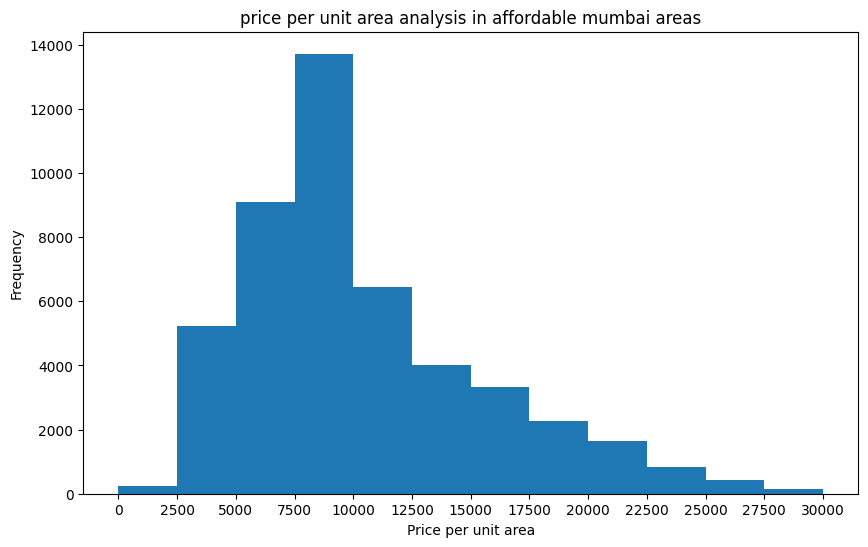

In [72]:
# mumbai_df['price_per_unit_area'].describe()
ranges = [x for x in range(0,30001,2500)]
plt.figure(figsize=(10,6))
plt.hist(mumbai_df.price_per_unit_area,bins=ranges)
plt.xticks(ranges)
plt.title('price per unit area analysis in affordable mumbai areas')
plt.xlabel('Price per unit area')
plt.ylabel('Frequency')
plt.show()

In [75]:
#creating ahmedabad dataframe
ahmedabad_df = df_city_data[df_city_data['City_name']=='Ahmedabad']
ahmedabad_df = ahmedabad_df[ahmedabad_df['Locality_category']=='Affordable']
ahmedabad_df['price_per_unit_area'] = ahmedabad_df['Price']/ahmedabad_df['Size']

In [78]:
ahmedabad_df['price_per_unit_area'] = ahmedabad_df['price_per_unit_area'].apply(lambda x: int(x))

In [79]:
ahmedabad_df.head()

,City_name,Locality_Name,Price,Size,Locality_category,price_per_unit_area
0,Ahmedabad,Bopal,7500000,1750,Affordable,4285
2,Ahmedabad,Naryanpura,13200840,2295,Affordable,5752
3,Ahmedabad,Changodar,2283000,918,Affordable,2486
4,Ahmedabad,Shilaj,9371000,1760,Affordable,5324
5,Ahmedabad,Hathijan,3385000,1305,Affordable,2593


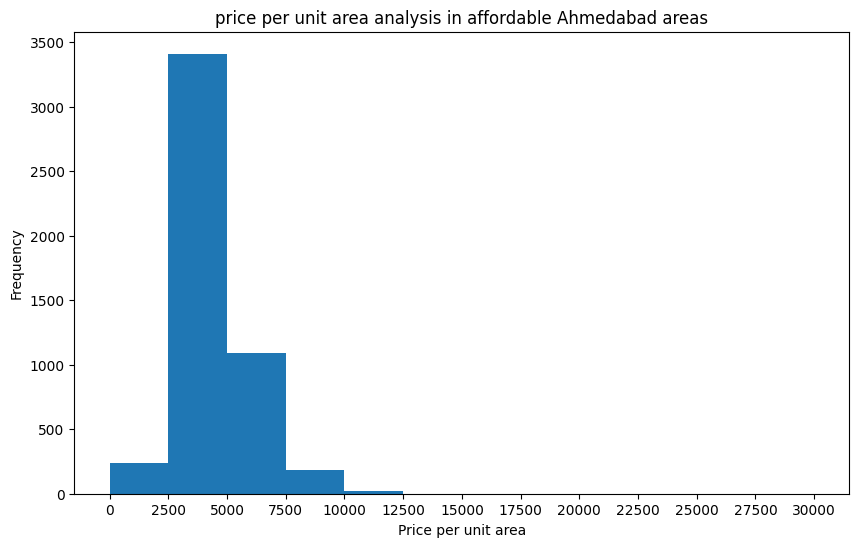

In [80]:
plt.figure(figsize=(10,6))
plt.hist(ahmedabad_df.price_per_unit_area,bins=ranges)
plt.xticks(ranges)
plt.title('price per unit area analysis in affordable Ahmedabad areas')
plt.xlabel('Price per unit area')
plt.ylabel('Frequency')
plt.show()

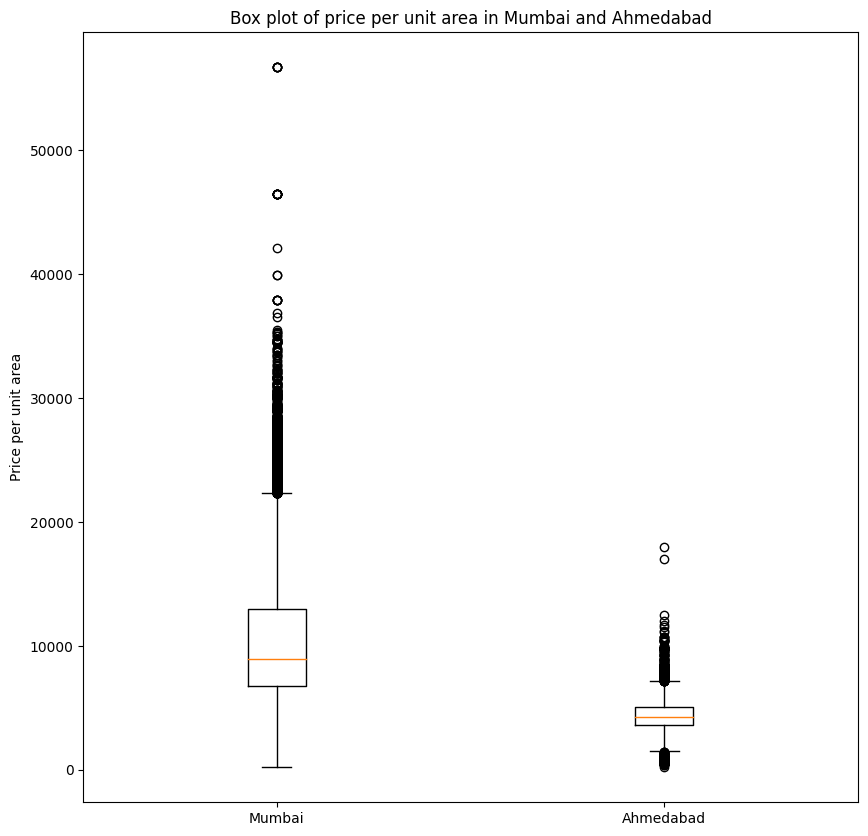

In [84]:
# plotting a box plot to compare between Mumbai and Ahmedabad
Mumbai = mumbai_df['price_per_unit_area']
Ahmedabad = ahmedabad_df['price_per_unit_area']
labels= ['Mumbai', 'Ahmedabad']
plt.figure(figsize=(10, 10))
plt.boxplot([Mumbai, Ahmedabad], labels=labels)
plt.title('Box plot of price per unit area in Mumbai and Ahmedabad')
plt.ylabel('Price per unit area')
plt.show()

In [85]:
df.columns

Index(['Property_Name', 'Property_id', 'Property_type', 'Property_status',
       'Price_per_unit_area', 'Posted_On', 'Project_URL', 'builder_id',
       'Builder_name', 'Property_building_status', 'City_id', 'City_name',
       'No_of_BHK', 'Locality_ID', 'Locality_Name', 'Longitude', 'Latitude',
       'Price', 'Size', 'Sub_urban_ID', 'Sub_urban_name', 'description',
       'is_furnished', 'listing_domain_score', 'is_plot', 'is_RERA_registered',
       'is_Apartment', 'is_ready_to_move', 'is_commercial_Listing',
       'is_PentaHouse', 'is_studio', 'Listing_Category', 'price_range'],
      dtype='object')

<Axes: ylabel='count'>

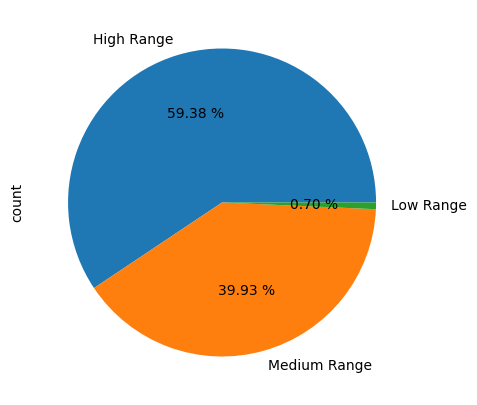

In [90]:
df[df['City_name']=='Mumbai']['price_range'].value_counts().plot(kind='pie', figsize=(10, 5),autopct='%.2f %%')

In [95]:
mumbai_df.head()

,City_name,Locality_Name,Price,Size,Locality_category,price_per_unit_area
71558,Mumbai,Bhiwandi,5616000,1080,Affordable,5200
71559,Mumbai,Kamothe,5800000,404,Affordable,14356
71560,Mumbai,Titwala,2900000,429,Affordable,6759
71561,Mumbai,Diva,3349000,619,Affordable,5410
71562,Mumbai,Dahisar,14000000,625,Affordable,22400


In [106]:
locality_counts=pd.DataFrame(mumbai_df['Locality_Name'].value_counts())

<Axes: ylabel='count'>

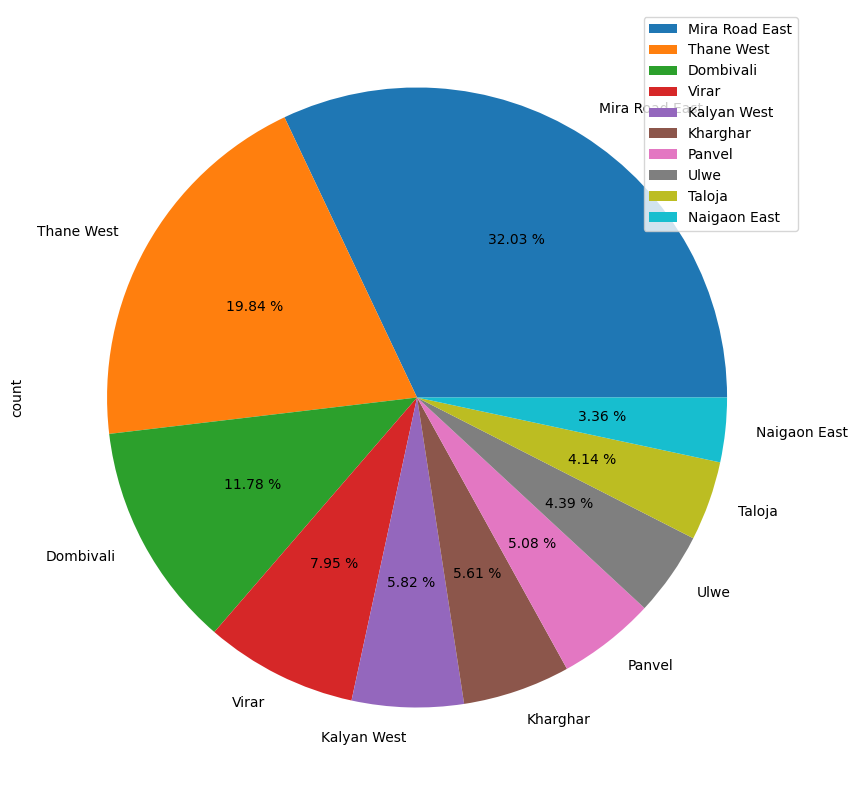

In [120]:
locality_counts.sort_values(by='count', ascending=False).head(10).plot(kind='pie', x='locality', y='count',autopct='%.2f %%',figsize=(10, 15))

In [126]:
top_locations_mumbai = ['Mira Road East','Thane West','Dombivali','Virar']

In [156]:
locality_group = mumbai_df.groupby('Locality_Name')

In [161]:
locality_summary_size = locality_group["Size"].agg(["mean","median"])

In [192]:
locality_summary_price = locality_group["Price"].agg(["mean","median"])

In [190]:
locality_summary_size.head()

,mean,median
Locality_Name,,
Adaigaon,585.500000,585.5
Agasan Village,600.000000,600.0
Agripada,531.705882,522.5
Airoli,746.013043,670.0
Ambarnath,694.444444,680.0


In [195]:
locality_summary_price.head()

,mean,median
Locality_Name,,
Adaigaon,3.200000e+06,3200000.0
Agasan Village,3.527800e+06,3527800.0
Agripada,4.111722e+06,2850000.0
Airoli,9.075517e+06,8415302.0
Ambarnath,2.694409e+06,2599680.0


In [205]:
top_locations_median_price = []
for location in top_locations_mumbai:
    for i in range(len(locality_summary_price)):
        if locality_summary_price.iloc[i].name==location:
            top_locations_median_price.append(locality_summary_price.iloc[i]['median'])


In [209]:
top_locations_median_size=[]
for location in top_locations_mumbai:
    for i in range(len(locality_summary_price)):
        if locality_summary_size.iloc[i].name==location:
            top_locations_median_size.append(locality_summary_size.iloc[i]['median'])

In [210]:
top_locations_median_size

[750.0, 679.0, 725.0, 631.0]

In [206]:
top_locations_median_price

[7400000.0, 8700008.0, 5175140.0, 3909310.0]

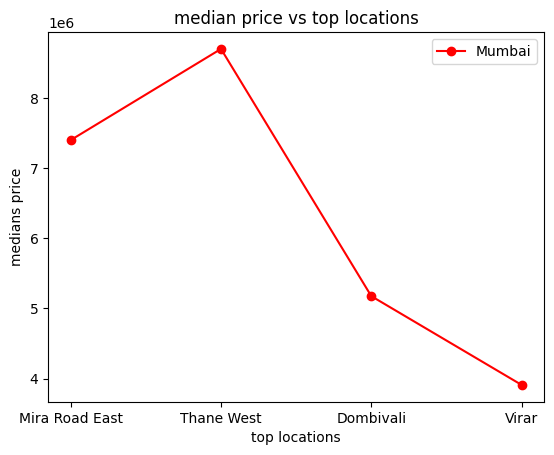

In [208]:
plt.plot(top_locations_mumbai,top_locations_median_price,label='Mumbai',color='red',marker='o')
plt.title('median price vs top locations')
plt.xlabel('top locations')
plt.ylabel('medians price')
plt.legend()
plt.show()

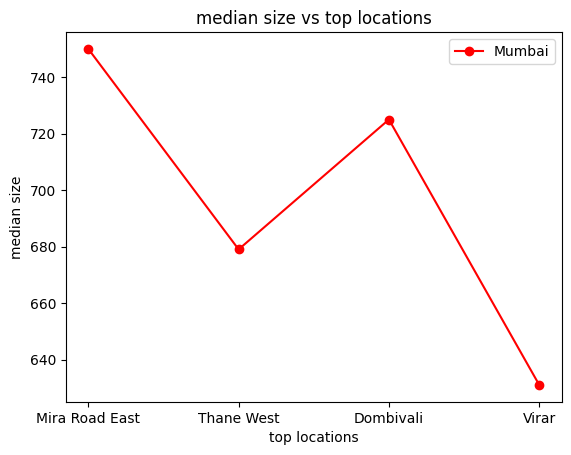

In [214]:
plt.plot(top_locations_mumbai,top_locations_median_size,label='Mumbai',color='red',marker='o')
# plt.plot(top_locations_mumbai,top_locations_median_price,label='Mumbai',color='green',marker='o')
plt.title('median size vs top locations')
plt.xlabel('top locations')
plt.ylabel('median size')
plt.legend()
plt.show()

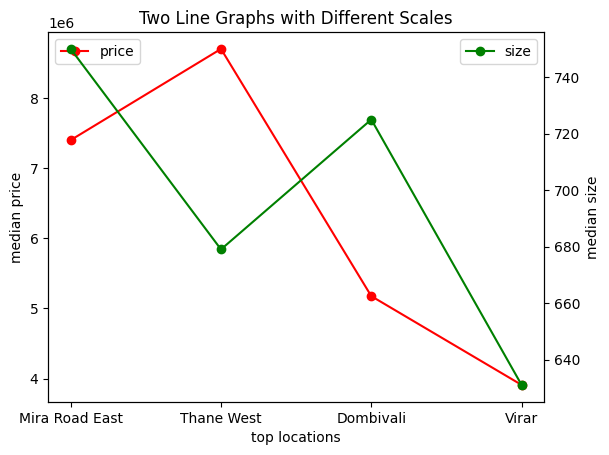

In [216]:

plt.plot(top_locations_mumbai,top_locations_median_price,label='price',color='red',marker='o')
plt.xlabel('top locations')
plt.ylabel('median price')
plt.legend(loc='upper left')


ax2 = plt.gca().twinx()
ax2.plot(top_locations_mumbai, top_locations_median_size, label='size', color='green',marker='o')
ax2.set_ylabel('median size')
ax2.legend(loc='upper right')
plt.title('Two Line Graphs with Different Scales')
plt.show()

<Axes: ylabel='count'>

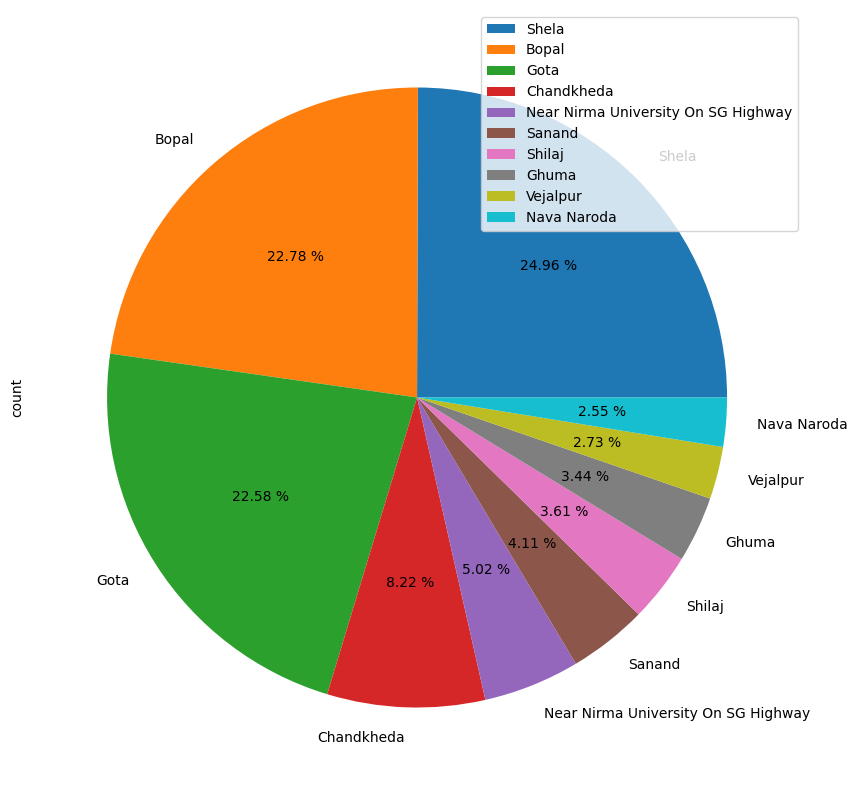

In [217]:
#analysis for ahmedabad
# first we will find the top locations in ahmedabad
locality_counts_ahmedabad=pd.DataFrame(ahmedabad_df['Locality_Name'].value_counts())
locality_counts_ahmedabad.sort_values(by='count', ascending=False).head(10).plot(kind='pie', x='locality', y='count',autopct='%.2f %%',figsize=(10, 15))

In [ ]:
top_locations_ahmedabad = ['Shela','Bopal','Gota','Chandkheda']
